# Part 2: Generate data 

## Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle, SampleAugmenter, random_morphing_points, morphing_point
from madminer.plotting import plot_distributions


17:18 madminer             INFO    
17:18 madminer             INFO    ------------------------------------------------------------------------
17:18 madminer             INFO    |                                                                      |
17:18 madminer             INFO    |  MadMiner v0.6.4                                                     |
17:18 madminer             INFO    |                                                                      |
17:18 madminer             INFO    |         Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer  |
17:18 madminer             INFO    |                                                                      |
17:18 madminer             INFO    ------------------------------------------------------------------------
17:18 madminer             INFO    


In [2]:
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_7_0/'

## Run simulator

In [4]:
miner = MadMiner()
miner.load("data/setup.h5")

12:36 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
12:36 madminer.core        INFO    Found 2 parameters:
12:36 madminer.core        INFO       CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-1.0, 1.0))
12:36 madminer.core        INFO       CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-1.0, 1.0))
12:36 madminer.core        INFO    Found 6 benchmarks:
12:36 madminer.core        INFO       morphing_basis_vector_0: CWL2 = 0.32, CPWL2 = 0.56
12:36 madminer.core        INFO       morphing_basis_vector_1: CWL2 = 1.00, CPWL2 = -8.87e-01
12:36 madminer.core        INFO       morphing_basis_vector_2: CWL2 = -4.00e-01, CPWL2 = 0.36
12:36 madminer.core        INFO       morphing_basis_vector_3: CWL2 = 0.04, CPWL2 = -6.25e-02
12:36 madminer.core        INFO       morphing_basis_vector_4: CWL2 = -7.86e-01, CPWL2 = -4.73e-01
12:36 madminer.core        INFO       morphing_basis_vector_5: CWL2 = -4.20e-01, CPWL2 = -8.67e-01
12:36 madminer

In [5]:
miner.run_multiple(
    mg_directory=mg_dir,
    mg_process_directory='./mg_processes/signal',
    proc_card_file='cards/proc_card.dat',
    param_card_template_file='cards/param_card_template.dat',
    pythia8_card_file='cards/pythia8_card.dat',
    run_card_files=['cards/run_card_small.dat'],
    log_directory='logs/',
    initial_command="source activate python2",
)

12:36 madminer.utils.inter INFO    Generating MadGraph process folder from cards/proc_card.dat at ./mg_processes/signal
12:36 madminer.core        INFO    Run 0
12:36 madminer.core        INFO      Sampling from benchmark: morphing_basis_vector_0
12:36 madminer.core        INFO      Original run card:       cards/run_card_small.dat
12:36 madminer.core        INFO      Original Pythia8 card:   cards/pythia8_card.dat
12:36 madminer.core        INFO      Original config card:    None
12:36 madminer.core        INFO      Copied run card:         /madminer/cards/run_card_0.dat
12:36 madminer.core        INFO      Copied Pythia8 card:     /madminer/cards/pythia8_card_0.dat
12:36 madminer.core        INFO      Copied config card:      None
12:36 madminer.core        INFO      Param card:              /madminer/cards/param_card_0.dat
12:36 madminer.core        INFO      Reweight card:           /madminer/cards/reweight_card_0.dat
12:36 madminer.core        INFO      Log file:                ru

In [19]:
def add_observables(reader):
    for symbol in ["a", "j"]:
        for i in range(2):
            reader.add_observable(
                "e_{}{}".format(symbol, i + 1), "{}[{}].e".format(symbol, i), required=True, 
            )
            reader.add_observable(
                "px_{}{}".format(symbol, i + 1), "{}[{}].px".format(symbol, i), required=True,
            )
            reader.add_observable(
                "py_{}{}".format(symbol, i + 1), "{}[{}].py".format(symbol, i), required=True,
            )
            reader.add_observable(
                "pz_{}{}".format(symbol, i + 1), "{}[{}].pz".format(symbol, i), required=True,
            )
            reader.add_observable(
                "pt_{}{}".format(symbol, i + 1), "{}[{}].pt".format(symbol, i), required=True,
            )
            reader.add_observable(
                "eta_{}{}".format(symbol, i + 1), "{}[{}].eta".format(symbol, i), required=True,
            )
            reader.add_observable(
                "phi_{}{}".format(symbol, i + 1), "{}[{}].phi()".format(symbol, i), required=True,
            )
        
    for symbol in ["a", "j"]:
        reader.add_observable(
            "e_{}{}".format(symbol, symbol), "({}[0] + {}[1]).e".format(symbol, symbol), required=True, 
        )
        reader.add_observable(
            "px_{}{}".format(symbol, symbol), "({}[0] + {}[1]).px".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "py_{}{}".format(symbol, symbol), "({}[0] + {}[1]).py".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "pz_{}{}".format(symbol, symbol), "({}[0] + {}[1]).pz".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "pt_{}{}".format(symbol, symbol), "({}[0] + {}[1]).pt".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "m_{}{}".format(symbol, symbol), "({}[0] + {}[1]).m".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "eta_{}{}".format(symbol, symbol), "({}[0] + {}[1]).eta".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "phi_{}{}".format(symbol, symbol), "({}[0] + {}[1]).phi()".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "deltaeta_{}{}".format(symbol, symbol), "{}[0].eta - {}[1].eta".format(symbol, symbol), required=True,
        )
        reader.add_observable(
            "deltaphi_{}{}".format(symbol, symbol), "{}[0].phi() - {}[1].phi()".format(symbol, symbol), required=True,
        )



In [20]:
def analyse_sample(i):
    delphes = DelphesReader('data/setup.h5')
    delphes.add_sample(
        lhe_filename='mg_processes/signal/Events/run_0{}/unweighted_events.lhe.gz'.format(i+1),
        hepmc_filename='mg_processes/signal/Events/run_0{}/tag_1_pythia8_events.hepmc.gz'.format(i+1),
        sampled_from_benchmark=list(miner.benchmarks.keys())[i],
        is_background=False,
        k_factor=1.,
    )
    delphes.run_delphes(
        delphes_directory=mg_dir + '/Delphes',
        delphes_card='cards/delphes_card.dat',
        log_file='logs/delphes.log',
    )
    
    add_observables(delphes)
    
    delphes.add_cut('j[1].pt > 20.')
    delphes.add_cut('a[1].pt > 10.')
    
    delphes.analyse_delphes_samples(delete_delphes_files=True)
    
    delphes.save('data/delphes_data{}.h5'.format(i))

In [25]:
analyse_sample(2)

12:19 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
12:19 madminer.delphes     DEBUG   Adding event sample mg_processes/signal/Events/run_03/tag_1_pythia8_events.hepmc.gz
12:19 madminer.delphes     INFO    Running Delphes on HepMC sample at mg_processes/signal/Events/run_03/tag_1_pythia8_events.hepmc.gz
12:19 madminer.utils.inter DEBUG   Unzipping mg_processes/signal/Events/run_03/tag_1_pythia8_events.hepmc.gz
12:34 madminer.utils.inter DEBUG   Deleting mg_processes/signal/Events/run_03/tag_1_pythia8_events.hepmc
12:34 madminer.delphes     DEBUG   Adding required observable e_a1 = a[0].e
12:34 madminer.delphes     DEBUG   Adding required observable px_a1 = a[0].px
12:34 madminer.delphes     DEBUG   Adding required observable py_a1 = a[0].py
12:34 madminer.delphes     DEBUG   Adding required observable pz_a1 = a[0].pz
12:34 madminer.delphes     DEBUG   Adding required observable pt_a1 = a[0].pt
12:34 madminer.delphes     DEBUG   Adding required observable e

12:39 madminer.utils.inter DEBUG     First 10 values for observable phi_a2:
[ 0.13456412         nan  0.84175676         nan -2.14415121  2.205863
         nan -2.01836467 -1.65295815 -2.84213829]
12:39 madminer.utils.inter DEBUG     First 10 values for observable e_j1:
[ 583.69318421 1260.47486506  127.12563674 1428.52340512  166.01253672
  482.43986073  652.79438614  286.90423991  600.04373468 1118.56329896]
12:40 madminer.utils.inter DEBUG     First 10 values for observable px_j1:
[ -25.02434167 -624.12488268   38.79422823 -437.18589556   33.49344695
 -181.03489183  581.16689189 -119.80464534  454.97760621   -5.88663432]
12:40 madminer.utils.inter DEBUG     First 10 values for observable py_j1:
[-123.45736079 -339.60039137  -95.35832523  725.36291478  -47.50890676
 -422.99525168  158.55119326   49.25173342  231.05675006  -58.65798423]
12:40 madminer.utils.inter DEBUG     First 10 values for observable pz_j1:
[ 569.74378775 1040.56302525   73.87795    1150.10863299 -155.41361411
 -14

12:50 madminer.utils.inter DEBUG     111860 / 200000 events pass required observable pz_a2
12:50 madminer.utils.inter DEBUG     111860 / 200000 events pass required observable pt_a2
12:50 madminer.utils.inter DEBUG     111860 / 200000 events pass required observable eta_a2
12:50 madminer.utils.inter DEBUG     111860 / 200000 events pass required observable phi_a2
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable e_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable px_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable py_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable pz_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable pt_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable eta_j1
12:50 madminer.utils.inter DEBUG     199863 / 200000 events pass required observable phi

12:52 madminer.utils.inter DEBUG   Combined is_nuisance: [0 0 0 0 0 0]
12:52 madminer.utils.inter DEBUG   Combined is_reference: [1 0 0 0 0 0]
12:52 madminer.utils.inter DEBUG   Weight names found in event file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
12:52 madminer.utils.inter DEBUG   Benchmarks found in MadMiner file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
12:52 madminer.sampling    DEBUG   Combining and shuffling samples
12:52 madminer.sampling    DEBUG   Copying setup from data/delphes_data2.h5 to data/delphes_data2.h5
12:52 madminer.sampling    DEBUG   Loading samples from file 1 / 1 at data/delphes_data2.h5, multiplying weights with k factor 1.0
12:52 madminer.sampling    DEBUG   Sampling benchmarks: [2 2 2 ... 2 2 2]
12:52 m

In [26]:
analyse_sample(3)

12:52 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
12:52 madminer.delphes     DEBUG   Adding event sample mg_processes/signal/Events/run_04/tag_1_pythia8_events.hepmc.gz
12:52 madminer.delphes     INFO    Running Delphes on HepMC sample at mg_processes/signal/Events/run_04/tag_1_pythia8_events.hepmc.gz
12:52 madminer.utils.inter DEBUG   Unzipping mg_processes/signal/Events/run_04/tag_1_pythia8_events.hepmc.gz
13:15 madminer.utils.inter DEBUG   Deleting mg_processes/signal/Events/run_04/tag_1_pythia8_events.hepmc
13:15 madminer.delphes     DEBUG   Adding required observable e_a1 = a[0].e
13:15 madminer.delphes     DEBUG   Adding required observable px_a1 = a[0].px
13:15 madminer.delphes     DEBUG   Adding required observable py_a1 = a[0].py
13:15 madminer.delphes     DEBUG   Adding required observable pz_a1 = a[0].pz
13:15 madminer.delphes     DEBUG   Adding required observable pt_a1 = a[0].pt
13:15 madminer.delphes     DEBUG   Adding required observable e

13:28 madminer.utils.inter DEBUG     First 10 values for observable phi_a2:
[-0.56144708         nan  0.16668078  1.53863311         nan -1.80506003
 -1.19469976 -1.93848658  0.53374922 -2.25427294]
13:29 madminer.utils.inter DEBUG     First 10 values for observable e_j1:
[  76.0081571  1618.20887138 1192.53892426 2203.77916898 1112.46406986
  310.39674856  343.87021137   89.32576323 1085.48361703  470.1048755 ]
13:29 madminer.utils.inter DEBUG     First 10 values for observable px_j1:
[  18.43944245   90.36055898  -40.63430956  -71.57691532   27.90138963
  -44.11254222 -234.36250275   53.99795372  -14.50181306  104.74849217]
13:29 madminer.utils.inter DEBUG     First 10 values for observable py_j1:
[-28.89350454   3.21105112 -39.99951881 158.087496    40.10237909
 -78.5900922  160.0583551  -41.81788126 -87.67272253  57.94139488]
13:29 madminer.utils.inter DEBUG     First 10 values for observable pz_j1:
[   67.74916433 -1615.66154532  1191.14718266  2196.9250049
  1111.36285043   296.6

13:38 madminer.utils.inter DEBUG     116498 / 200000 events pass required observable pz_a2
13:38 madminer.utils.inter DEBUG     116498 / 200000 events pass required observable pt_a2
13:38 madminer.utils.inter DEBUG     116498 / 200000 events pass required observable eta_a2
13:38 madminer.utils.inter DEBUG     116498 / 200000 events pass required observable phi_a2
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable e_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable px_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable py_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable pz_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable pt_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable eta_j1
13:38 madminer.utils.inter DEBUG     199053 / 200000 events pass required observable phi

13:39 madminer.utils.inter DEBUG   Combined is_nuisance: [0 0 0 0 0 0]
13:39 madminer.utils.inter DEBUG   Combined is_reference: [1 0 0 0 0 0]
13:39 madminer.utils.inter DEBUG   Weight names found in event file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
13:39 madminer.utils.inter DEBUG   Benchmarks found in MadMiner file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
13:39 madminer.sampling    DEBUG   Combining and shuffling samples
13:39 madminer.sampling    DEBUG   Copying setup from data/delphes_data3.h5 to data/delphes_data3.h5
13:39 madminer.sampling    DEBUG   Loading samples from file 1 / 1 at data/delphes_data3.h5, multiplying weights with k factor 1.0
13:39 madminer.sampling    DEBUG   Sampling benchmarks: [3 3 3 ... 3 3 3]
13:39 m

In [27]:
analyse_sample(4)

13:39 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
13:39 madminer.delphes     DEBUG   Adding event sample mg_processes/signal/Events/run_05/tag_1_pythia8_events.hepmc.gz
13:39 madminer.delphes     INFO    Running Delphes on HepMC sample at mg_processes/signal/Events/run_05/tag_1_pythia8_events.hepmc.gz
13:39 madminer.utils.inter DEBUG   Unzipping mg_processes/signal/Events/run_05/tag_1_pythia8_events.hepmc.gz
13:53 madminer.utils.inter DEBUG   Deleting mg_processes/signal/Events/run_05/tag_1_pythia8_events.hepmc
13:53 madminer.delphes     DEBUG   Adding required observable e_a1 = a[0].e
13:53 madminer.delphes     DEBUG   Adding required observable px_a1 = a[0].px
13:53 madminer.delphes     DEBUG   Adding required observable py_a1 = a[0].py
13:53 madminer.delphes     DEBUG   Adding required observable pz_a1 = a[0].pz
13:53 madminer.delphes     DEBUG   Adding required observable pt_a1 = a[0].pt
13:53 madminer.delphes     DEBUG   Adding required observable e

13:58 madminer.utils.inter DEBUG     First 10 values for observable phi_a2:
[ 2.32882857 -1.65274596 -1.87387085  2.18683863 -1.12472951  1.17804086
         nan -0.44124073  1.05166554         nan]
13:58 madminer.utils.inter DEBUG     First 10 values for observable e_j1:
[ 433.2753445   980.04336656  566.76617226  550.75422166  588.49432312
  528.39140241  684.75837044  539.09597536 1261.76364801 1399.77712784]
13:59 madminer.utils.inter DEBUG     First 10 values for observable px_j1:
[ 135.75006426 -100.66707555  214.18603028  390.08182768  143.22803698
    3.58813224  101.52686845   83.50062089  -84.13864162 -122.02285461]
13:59 madminer.utils.inter DEBUG     First 10 values for observable py_j1:
[-285.89606337  513.74511828  331.84319922 -296.06198847  149.94851584
 -195.32281923 -567.97635194  186.17802413  -95.84172638  155.42937289]
13:59 madminer.utils.inter DEBUG     First 10 values for observable pz_j1:
[  295.82946687  -827.92863123  -402.74651231  -249.66530668
   550.64252

14:09 madminer.utils.inter DEBUG     108414 / 200000 events pass required observable pz_a2
14:09 madminer.utils.inter DEBUG     108414 / 200000 events pass required observable pt_a2
14:09 madminer.utils.inter DEBUG     108414 / 200000 events pass required observable eta_a2
14:09 madminer.utils.inter DEBUG     108414 / 200000 events pass required observable phi_a2
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable e_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable px_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable py_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable pz_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable pt_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable eta_j1
14:09 madminer.utils.inter DEBUG     199927 / 200000 events pass required observable phi

14:10 madminer.utils.inter DEBUG   Combined is_nuisance: [0 0 0 0 0 0]
14:10 madminer.utils.inter DEBUG   Combined is_reference: [1 0 0 0 0 0]
14:10 madminer.utils.inter DEBUG   Weight names found in event file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
14:10 madminer.utils.inter DEBUG   Benchmarks found in MadMiner file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
14:10 madminer.sampling    DEBUG   Combining and shuffling samples
14:10 madminer.sampling    DEBUG   Copying setup from data/delphes_data4.h5 to data/delphes_data4.h5
14:10 madminer.sampling    DEBUG   Loading samples from file 1 / 1 at data/delphes_data4.h5, multiplying weights with k factor 1.0
14:10 madminer.sampling    DEBUG   Sampling benchmarks: [4 4 4 ... 4 4 4]
14:10 m

In [28]:
analyse_sample(5)

14:10 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
14:10 madminer.delphes     DEBUG   Adding event sample mg_processes/signal/Events/run_06/tag_1_pythia8_events.hepmc.gz
14:10 madminer.delphes     INFO    Running Delphes on HepMC sample at mg_processes/signal/Events/run_06/tag_1_pythia8_events.hepmc.gz
14:10 madminer.utils.inter DEBUG   Unzipping mg_processes/signal/Events/run_06/tag_1_pythia8_events.hepmc.gz
14:23 madminer.utils.inter DEBUG   Deleting mg_processes/signal/Events/run_06/tag_1_pythia8_events.hepmc
14:23 madminer.delphes     DEBUG   Adding required observable e_a1 = a[0].e
14:23 madminer.delphes     DEBUG   Adding required observable px_a1 = a[0].px
14:23 madminer.delphes     DEBUG   Adding required observable py_a1 = a[0].py
14:23 madminer.delphes     DEBUG   Adding required observable pz_a1 = a[0].pz
14:23 madminer.delphes     DEBUG   Adding required observable pt_a1 = a[0].pt
14:23 madminer.delphes     DEBUG   Adding required observable e

14:28 madminer.utils.inter DEBUG     First 10 values for observable phi_a2:
[ 1.42389977  1.39200974         nan  1.97682726  1.21408582  1.83211744
 -2.93937016 -2.87215257  1.42719078         nan]
14:29 madminer.utils.inter DEBUG     First 10 values for observable e_j1:
[580.34343933 203.43190171 570.26109696 445.44916907 245.38492788
 869.15179218 347.01690297 793.33890977 559.13435725 766.69333059]
14:29 madminer.utils.inter DEBUG     First 10 values for observable px_j1:
[ -40.56968208  119.93764654 -483.65687288  107.92883462   54.02496321
  539.29279733  185.53811806   31.05550496  237.69140693 -711.41398403]
14:29 madminer.utils.inter DEBUG     First 10 values for observable py_j1:
[-5.76528870e+02 -6.46912789e+01 -2.70647396e+02 -4.10464585e+02
 -1.47238053e+02 -2.14212481e+02 -6.66074297e+00 -8.75527495e+01
 -3.60891742e-01  2.80738014e+02]
14:29 madminer.utils.inter DEBUG     First 10 values for observable pz_j1:
[  48.17621826  150.70017503   24.86670993 -134.05809005  188.

14:39 madminer.utils.inter DEBUG     112564 / 200000 events pass required observable py_a2
14:39 madminer.utils.inter DEBUG     112564 / 200000 events pass required observable pz_a2
14:39 madminer.utils.inter DEBUG     112564 / 200000 events pass required observable pt_a2
14:39 madminer.utils.inter DEBUG     112564 / 200000 events pass required observable eta_a2
14:39 madminer.utils.inter DEBUG     112564 / 200000 events pass required observable phi_a2
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable e_j1
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable px_j1
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable py_j1
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable pz_j1
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable pt_j1
14:39 madminer.utils.inter DEBUG     199928 / 200000 events pass required observable eta_

14:39 madminer.utils.inter DEBUG   Combined benchmark names: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
14:39 madminer.utils.inter DEBUG   Combined is_nuisance: [0 0 0 0 0 0]
14:39 madminer.utils.inter DEBUG   Combined is_reference: [1 0 0 0 0 0]
14:39 madminer.utils.inter DEBUG   Weight names found in event file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
14:39 madminer.utils.inter DEBUG   Benchmarks found in MadMiner file: [u'morphing_basis_vector_0', u'morphing_basis_vector_1', u'morphing_basis_vector_2', u'morphing_basis_vector_3', u'morphing_basis_vector_4', u'morphing_basis_vector_5']
14:39 madminer.sampling    DEBUG   Combining and shuffling samples
14:39 madminer.sampling    DEBUG   Copying setup from data/delphes_data5.h5 to data

In [30]:
combine_and_shuffle(
    ['data/delphes_data{}.h5'.format(i) for i in range(6)],
    'data/delphes_data.h5'
)

14:40 madminer.sampling    DEBUG   Combining and shuffling samples
14:40 madminer.sampling    WARNING Careful: this tool assumes that all samples are generated with the same setup, including identical benchmarks (and thus morphing setup), and identical nuisance parameters. If it is used with samples with different settings, there will be wrong results! There are no explicit cross checks in place yet.
14:40 madminer.sampling    DEBUG   Copying setup from data/delphes_data0.h5 to data/delphes_data.h5
14:40 madminer.sampling    DEBUG   Loading samples from file 1 / 6 at data/delphes_data0.h5, multiplying weights with k factor 1.0
14:40 madminer.sampling    DEBUG   Sampling benchmarks: [0 0 0 ... 0 0 0]
14:40 madminer.sampling    DEBUG   Sampling benchmarks: [0 0 0 ... 0 0 0]
14:40 madminer.sampling    DEBUG   Combined sampling benchmarks: [0 0 0 ... 0 0 0]
14:40 madminer.sampling    DEBUG   Loading samples from file 2 / 6 at data/delphes_data1.h5, multiplying weights with k factor 1.0
14:

## Plot features

16:05 madminer.analysis    INFO    Loading data from data/delphes_data.h5
16:05 madminer.analysis    INFO    Found 2 parameters
16:05 madminer.analysis    INFO    Did not find nuisance parameters
16:05 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
16:05 madminer.analysis    INFO    Found 48 observables
16:05 madminer.analysis    INFO    Found 630610 events
16:05 madminer.analysis    INFO      105696 signal events sampled from benchmark morphing_basis_vector_0
16:05 madminer.analysis    INFO      101737 signal events sampled from benchmark morphing_basis_vector_1
16:05 madminer.analysis    INFO      106743 signal events sampled from benchmark morphing_basis_vector_2
16:05 madminer.analysis    INFO      102700 signal events sampled from benchmark morphing_basis_vector_3
16:05 madminer.analysis    INFO      104279 signal events sampled from benchmark morphing_basis_vector_4
16:05 madminer.analysis    INFO      109455 signal events sampled from benchmark morphing_bas

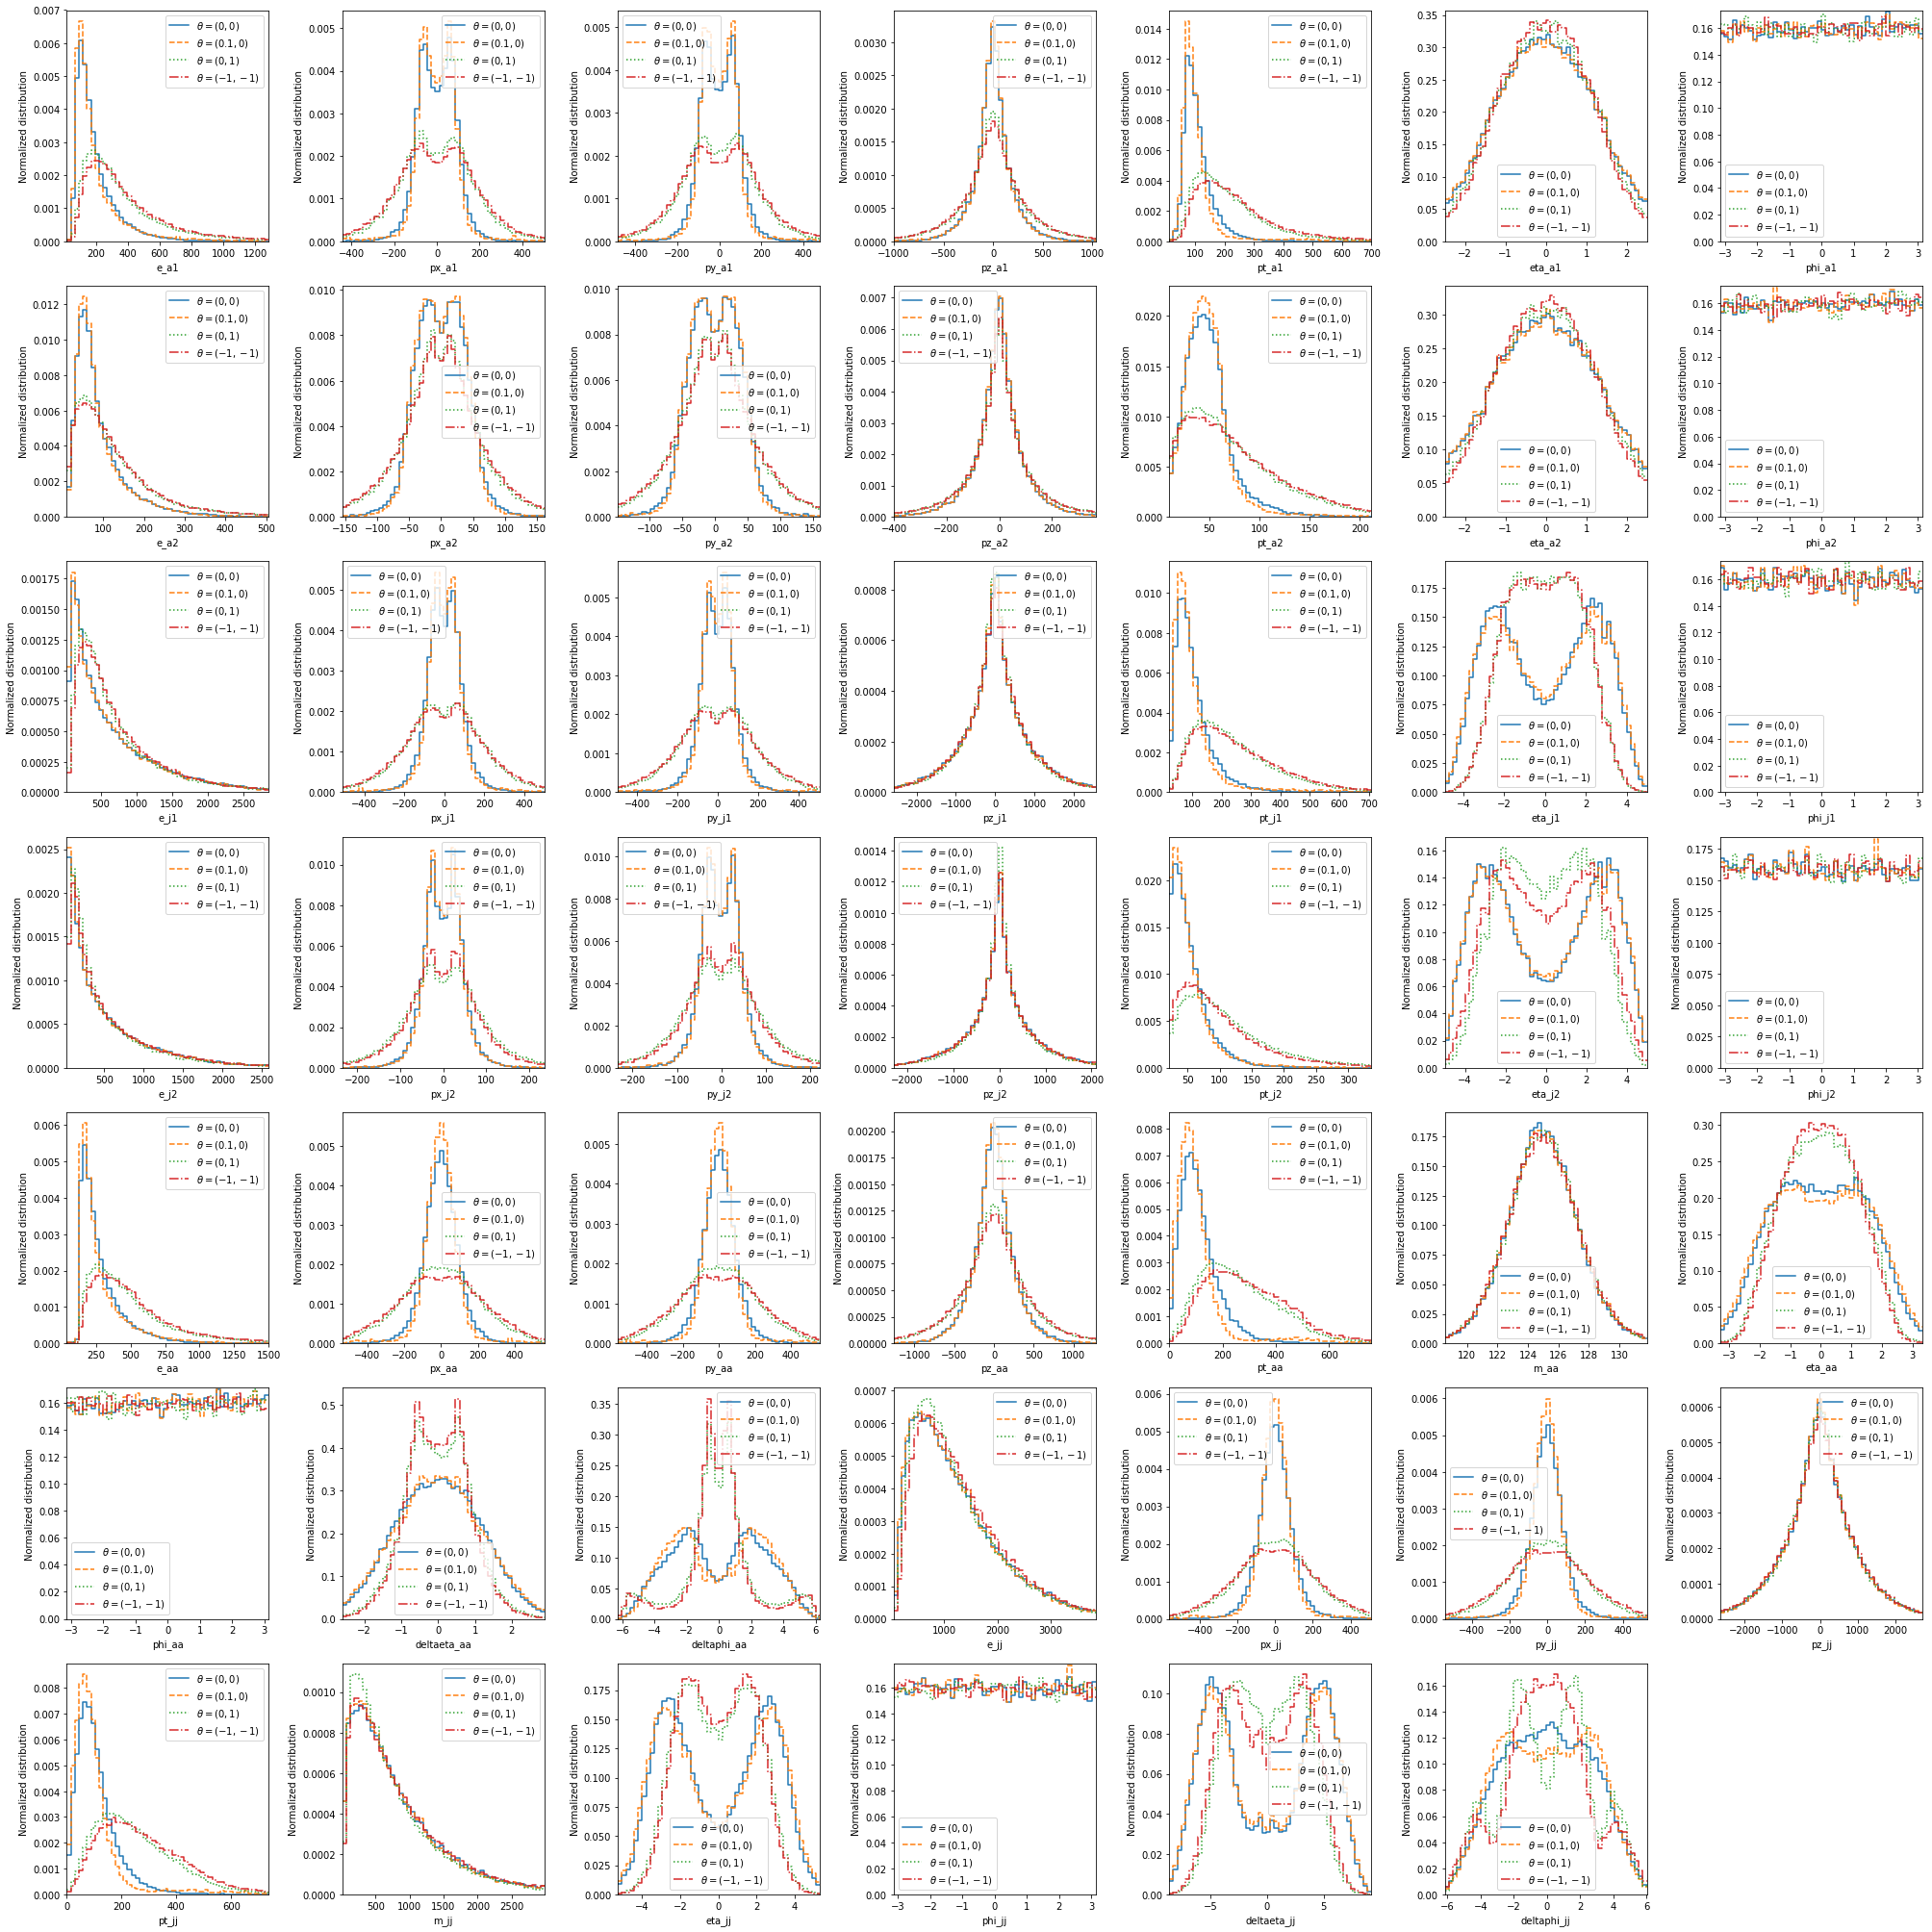

In [9]:
ax = plot_distributions(
    filename='data/delphes_data.h5',
    parameter_points=[np.array([0.,0.]), np.array([0.1,0.]), np.array([0.,1.]),np.array([-1.,-1.]), ],
    line_labels=[r'$\theta=(0,0)$', r'$\theta=(0.1,0)$', r'$\theta=(0,1)$', r'$\theta=(-1,-1)$'],
    uncertainties='none',
    n_bins=50,
    n_cols=7,
    normalize=True,
)

ax.savefig("features.pdf")

## Prepare training data

In [3]:
sampler = SampleAugmenter("data/delphes_data.h5")

17:19 madminer.analysis    INFO    Loading data from data/delphes_data.h5
17:19 madminer.analysis    INFO    Found 2 parameters
17:19 madminer.analysis    INFO    Did not find nuisance parameters
17:19 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
17:19 madminer.analysis    INFO    Found 48 observables
17:19 madminer.analysis    INFO    Found 630610 events
17:19 madminer.analysis    INFO      105696 signal events sampled from benchmark morphing_basis_vector_0
17:19 madminer.analysis    INFO      101737 signal events sampled from benchmark morphing_basis_vector_1
17:19 madminer.analysis    INFO      106743 signal events sampled from benchmark morphing_basis_vector_2
17:19 madminer.analysis    INFO      102700 signal events sampled from benchmark morphing_basis_vector_3
17:19 madminer.analysis    INFO      104279 signal events sampled from benchmark morphing_basis_vector_4
17:19 madminer.analysis    INFO      109455 signal events sampled from benchmark morphing_bas

In [4]:
_ = sampler.sample_train_local(
    theta=random_morphing_points(1000, [("gaussian", 0., 1.), ("gaussian", 0., 1.)]),
    n_samples=1000000,
    folder="data/samples",
    filename="train",
    validation_split=0.
)

15:55 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to 1000 random morphing points, drawn from the following priors:
  theta_0 ~ Gaussian with mean 0.0 and std 1.0
  theta_1 ~ Gaussian with mean 0.0 and std 1.0
15:55 madminer.sampling    INFO    Starting sampling serially
15:55 madminer.sampling    WARNING Large statistical uncertainty on the total cross section when sampling from theta = [ 0.363784   -0.17123501]: (0.002802 +/- 0.000309) pb (11.017913179631094 %). Skipping these warnings in the future...
15:55 madminer.sampling    WARNING For this value of theta, 1 / 16805 events have negative weight and will be ignored
15:55 madminer.sampling    INFO    Sampling from parameter point 50 / 1000
15:55 madminer.sampling    INFO    Sampling from parameter point 100 / 1000
15:56 madminer.sampling    INFO    Sampling from parameter point 150 / 1000
15:56 madminer.sampling    INFO    Sampling from parameter point 2

In [7]:
_ = sampler.sample_test(
    theta=morphing_point([0.,0.]),
    n_samples=10000,
    folder="data/samples",
    filename="test",
    validation_split=0.
)

16:05 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [0. 0.]
16:05 madminer.sampling    INFO    Starting sampling serially
16:05 madminer.sampling    INFO    Sampling from parameter point 1 / 1
16:05 madminer.sampling    INFO    Effective number of samples: mean 1020.4686442935022, with individual thetas ranging from 1020.4686442935025 to 1020.4686442935025


In [4]:
_ = sampler.sample_test(
    theta=morphing_point([0.5,0.]),
    n_samples=10000,
    folder="data/samples",
    filename="test1",
    validation_split=0.
)

09:24 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [0.5 0. ]
09:24 madminer.sampling    INFO    Starting sampling serially
09:24 madminer.sampling    INFO    Sampling from parameter point 1 / 1
09:24 madminer.sampling    WARNING Large statistical uncertainty on the total cross section when sampling from theta = [0.5 0. ]: (0.003872 +/- 0.000719) pb (18.560533863593854 %). Skipping these warnings in the future...
09:24 madminer.sampling    INFO    Effective number of samples: mean 21.62570466171275, with individual thetas ranging from 21.625704661712756 to 21.625704661712756


In [5]:
_ = sampler.sample_test(
    theta=morphing_point([-1.,-1.]),
    n_samples=10000,
    folder="data/samples",
    filename="test2",
    validation_split=0.
)

09:26 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to [-1. -1.]
09:26 madminer.sampling    INFO    Starting sampling serially
09:26 madminer.sampling    INFO    Sampling from parameter point 1 / 1
09:26 madminer.sampling    INFO    Effective number of samples: mean 543.5161846399212, with individual thetas ranging from 543.5161846399211 to 543.5161846399211


## 2D version

In [6]:
for i, name in enumerate(sampler.observables.keys()):
    print(i, name)

0 e_a1
1 px_a1
2 py_a1
3 pz_a1
4 pt_a1
5 eta_a1
6 phi_a1
7 e_a2
8 px_a2
9 py_a2
10 pz_a2
11 pt_a2
12 eta_a2
13 phi_a2
14 e_j1
15 px_j1
16 py_j1
17 pz_j1
18 pt_j1
19 eta_j1
20 phi_j1
21 e_j2
22 px_j2
23 py_j2
24 pz_j2
25 pt_j2
26 eta_j2
27 phi_j2
28 e_aa
29 px_aa
30 py_aa
31 pz_aa
32 pt_aa
33 m_aa
34 eta_aa
35 phi_aa
36 deltaeta_aa
37 deltaphi_aa
38 e_jj
39 px_jj
40 py_jj
41 pz_jj
42 pt_jj
43 m_jj
44 eta_jj
45 phi_jj
46 deltaeta_jj
47 deltaphi_jj


In [13]:
features = [18, 47]

x_train_2d = np.load("data/samples/x_train.npy")[:,features]
theta_train_2d = np.load("data/samples/theta_train.npy")
x_test_2d = np.load("data/samples/x_test.npy")[:,features]

np.save("data/samples/x_train_2d.npy", x_train_2d)
np.save("data/samples/theta_train_2d.npy", theta_train_2d)
np.save("data/samples/x_test_2d.npy", x_test_2d)

In [7]:
features = [18, 47]

x_test1_2d = np.load("data/samples/x_test1.npy")[:,features]
x_test2_2d = np.load("data/samples/x_test2.npy")[:,features]

np.save("data/samples/x_test1_2d.npy", x_test1_2d)
np.save("data/samples/x_test2_2d.npy", x_test2_2d)

## 40D version

In [12]:
features = [i for i in range(48) if i not in [6, 13, 20, 27, 35, 37, 45, 47]]

x_train_40d = np.load("data/samples/x_train.npy")[:,features]
theta_train_40d = np.load("data/samples/theta_train.npy")
x_test_40d = np.load("data/samples/x_test.npy")[:,features]
x_test1_40d = np.load("data/samples/x_test1.npy")[:,features]
x_test2_40d = np.load("data/samples/x_test2.npy")[:,features]

np.save("data/samples/x_train_40d.npy", x_train_40d)
np.save("data/samples/theta_train_40d.npy", theta_train_40d)
np.save("data/samples/x_test_40d.npy", x_test_40d)
np.save("data/samples/x_test1_40d.npy", x_test1_40d)
np.save("data/samples/x_test2_40d.npy", x_test2_40d)

In [13]:
for new_i, orig_i in enumerate(features):
    print(orig_i, "->", new_i, sampler.observables.keys()[orig_i])

0 -> 0 e_a1
1 -> 1 px_a1
2 -> 2 py_a1
3 -> 3 pz_a1
4 -> 4 pt_a1
5 -> 5 eta_a1
7 -> 6 e_a2
8 -> 7 px_a2
9 -> 8 py_a2
10 -> 9 pz_a2
11 -> 10 pt_a2
12 -> 11 eta_a2
14 -> 12 e_j1
15 -> 13 px_j1
16 -> 14 py_j1
17 -> 15 pz_j1
18 -> 16 pt_j1
19 -> 17 eta_j1
21 -> 18 e_j2
22 -> 19 px_j2
23 -> 20 py_j2
24 -> 21 pz_j2
25 -> 22 pt_j2
26 -> 23 eta_j2
28 -> 24 e_aa
29 -> 25 px_aa
30 -> 26 py_aa
31 -> 27 pz_aa
32 -> 28 pt_aa
33 -> 29 m_aa
34 -> 30 eta_aa
36 -> 31 deltaeta_aa
38 -> 32 e_jj
39 -> 33 px_jj
40 -> 34 py_jj
41 -> 35 pz_jj
42 -> 36 pt_jj
43 -> 37 m_jj
44 -> 38 eta_jj
46 -> 39 deltaeta_jj


## Feature means and stds

In [10]:
x_train = np.load("data/samples/x_train.npy")
print("x_means = np.array({})".format(", ".join([str(x) for x in np.mean(x_train, axis=0)])))
print("x_stds = np.array({})".format(", ".join([str(x) for x in np.std(x_train, axis=0)])))
print("x_means_2d = np.array({})".format(", ".join([str(x) for x in np.mean(x_train_2d, axis=0)])))
print("x_stds_2d = np.array({})".format(", ".join([str(x) for x in np.std(x_train_2d, axis=0)])))
print("x_means_40d = np.array({})".format(", ".join([str(x) for x in np.mean(x_train_40d, axis=0)])))
print("x_stds_40d = np.array({})".format(", ".join([str(x) for x in np.std(x_train_40d, axis=0)])))

x_means_40d = np.array(399.37213, -0.43740344, 0.6336686, -0.6348415, 249.49158, -0.003057861, 131.7912, -0.05828116, 0.24816507, -0.7630951, 76.36908, -0.005826209, 757.37, -0.10769359, -0.6086537, -6.178487, 264.52158, -0.008442603, 574.55524, 0.07781012, -0.09404507, 2.8334167, 104.1036, 0.0012078341, 531.1633, -0.49568462, 0.8818339, -1.3979366, 304.6138, 127.9752, -0.004153981, 0.0027683484, 1331.9247, -0.029883433, -0.7026987, -3.3450694, 285.39395, 884.056, -0.008315955, -0.009650437)
x_stds_40d = np.array(299.35312, 211.85915, 212.03178, 399.08353, 166.1214, 1.0561188, 111.997505, 64.16174, 64.08385, 147.26929, 48.90089, 1.1154486, 634.2648, 222.84987, 223.1163, 935.7079, 171.67308, 1.7555672, 597.842, 90.13577, 90.237915, 819.1639, 73.68713, 2.3172193, 337.30893, 250.67441, 250.83035, 501.64795, 181.56274, 46.119442, 1.164671, 0.84049183, 868.1088, 237.49751, 237.65948, 1025.469, 177.30736, 762.6249, 1.8738469, 3.466002)
